In [82]:
# Mathematical/data cleaning tools
import numpy as np
import pandas as pd
from collections import Counter

#sklearn
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import csr_matrix

#gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
# nltk.download('wordnet')

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

## Twitter Data

In [83]:
twitter = pd.read_csv('data/full-corpus.csv')
# twitter2 = pd.read_csv('data/twitter_en.txt', sep='\n')
len(twitter)

5113

In [84]:
twitter.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [85]:
twitter['Sentiment'].unique()

array(['positive', 'negative', 'neutral', 'irrelevant'], dtype=object)

In [86]:
pos_df = twitter[twitter['Sentiment'] == 'positive']
print(len(pos_df))

519


In [87]:
neg_df = twitter[twitter['Sentiment'] == 'negative']
print(len(neg_df))

572


In [88]:
neutral_df = twitter[twitter['Sentiment'] == 'neutral']
print(len(neutral_df))

2333


In [89]:
irr_df = twitter[twitter['Sentiment'] == 'irrelevant']
print(len(irr_df))

1689


In [90]:
twitter.Topic.unique()

array(['apple', 'google', 'microsoft', 'twitter'], dtype=object)

In [91]:
apple_df = twitter[twitter['Topic'] == 'apple']
len(apple_df)

1142

In [92]:
google_df = twitter[twitter['Topic'] == 'google']
len(google_df)

1317

In [93]:
microsoft_df = twitter[twitter['Topic'] == 'microsoft']
len(microsoft_df)

1364

In [94]:
twitter_df = twitter[twitter['Topic'] == 'twitter']
len(twitter_df)

1290

In [95]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text, min_len=0):
    result = []
    stopwords = STOPWORDS.copy()
    stopwords = set(stopwords)
    stopwords.update(["google", "apple", "rt", "twitter", "http", "microsoft", "la", "el", "en"])
    for token in gensim.utils.simple_preprocess(text, deacc=True):
        if token not in stopwords and len(token) > min_len:
            result.append(lemmatize_stemming(token))
    return result

In [96]:
stemmer = SnowballStemmer('english')
processed_docs = twitter['TweetText'].map(preprocess)

In [97]:
type(processed_docs)

pandas.core.series.Series

In [98]:
processed_docs.head(20)

0                          [swype, iphon, crack, iphon]
1               [add, carrier, support, iphon, announc]
2     [hilari, youtub, video, guy, duet, siri, prett...
3                        [rim, easi, switch, iphon, ya]
4                      [realiz, reason, get, io, thank]
5     [current, blackberri, user, littl, bite, disap...
6     [strangest, thing, siri, say, far, sooo, glad,...
7     [great, close, person, event, tonight, regent,...
8     [compani, experi, best, custom, servic, asid, ...
9                               [appli, job, hope, lol]
10    [jamaicanidl, lmao, think, magic, die, haha, s...
11    [lmao, think, magic, die, haha, siri, suggest,...
12    [philliprowntre, regist, develop, hop, actual,...
13    [wow, great, deal, refurb, ipad, gen, model, o...
14    [regist, develop, hop, actual, help, great, ap...
15    [你好, current, learn, mandarin, upcom, trip, ho...
16    [come, dark, gretcheneclark, hey, send, free, ...
17    [hey, send, free, iphon, version, public, 

In [99]:
doc_array = processed_docs.to_numpy()

In [100]:
# doc_array = doc_array.reshape((-1,1))
# doc_array[0]

In [101]:
# def wc_whole_corpus(doc_array):
# #     doc_array = np.array(doc_array).flatten()
#     y = np.array([np.array(xi[0]).flatten() for xi in doc_array]).flatten()
#     unique, counts = np.unique(y, return_counts=True)
#     return dict(zip(unique, counts))
def wc_whole_corpus(doc_array):
    # y = np.array([np.array(xi) for xi in self.corpus])
    # y = np.array(self.corpus)
    y = np.array([y for xi in doc_array for y in xi])
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

In [102]:
word_count = wc_whole_corpus(doc_array)
word_count

{'aa': 3,
 'aaa': 2,
 'aaargh': 1,
 'aac': 1,
 'aaddaqa': 1,
 'aai': 1,
 'aalkhubaizi': 1,
 'aan': 8,
 'aanbied': 3,
 'aanbod': 1,
 'aangekondigd': 1,
 'aantal': 1,
 'aantikken': 1,
 'aap': 1,
 'aapl': 2,
 'ab': 8,
 'abaikan': 1,
 'abandon': 1,
 'abandonado': 1,
 'abarcar': 1,
 'abba': 1,
 'abbattera': 1,
 'abbia': 1,
 'abbrevi': 3,
 'abc': 1,
 'abdullah': 1,
 'abend': 1,
 'aberto': 1,
 'abhordienst': 1,
 'abhurvyc': 1,
 'abia': 1,
 'abil': 3,
 'abl': 8,
 'abonnez': 1,
 'aboutthatlif': 1,
 'abraco': 2,
 'abrass': 1,
 'abrazan': 2,
 'abrazo': 2,
 'abren': 1,
 'abri': 2,
 'abrir': 1,
 'abro': 1,
 'abruma': 1,
 'absolut': 5,
 'absoluto': 1,
 'absorbiendo': 1,
 'abstract': 2,
 'absturz': 1,
 'absurdo': 1,
 'abt': 3,
 'aburr': 1,
 'aburrido': 1,
 'aburriiiidooo': 1,
 'aburrio': 1,
 'abusou': 1,
 'abxl': 1,
 'abzuhangen': 2,
 'ac': 3,
 'aca': 1,
 'acaba': 4,
 'acaban': 1,
 'acabara': 2,
 'acabo': 6,
 'acabou': 2,
 'academi': 1,
 'acap': 1,
 'acappellamedia': 1,
 'acaso': 1,
 'acc': 2,
 'acce

In [103]:
wc_df = pd.DataFrame.from_dict(word_count, orient='index')
wc_df.head()

,0
aa,3
aaa,2
aaargh,1
aac,1
aaddaqa,1


In [104]:
wc_df = wc_df.sort_values(by=0, ascending=False)
wc_df

,0
android,738
iphon,367
nexus,313
samsung,296
new,295
que,269
phone,235
galaxi,232
sandwich,224
cream,220


In [105]:
wc_20 = wc_df[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

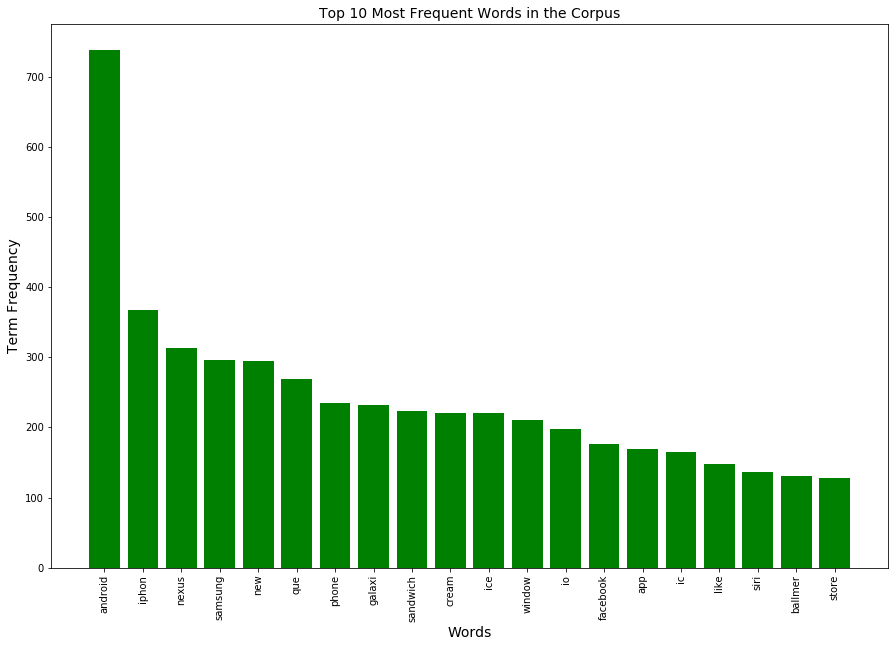

In [106]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(wc_20.index, wc_20[0], color='g')
plt.title("Top 10 Most Frequent Words in the Corpus", fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Term Frequency', fontsize=14)
plt.savefig('media/tf.png')
plt.xticks(rotation=90)

In [107]:
#create dictionary
id2word = gensim.corpora.Dictionary(processed_docs)

#create corpus
texts = processed_docs

#Term Document Frequency
bow_corpus = [id2word.doc2bow(text) for text in texts]

In [108]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in bow_corpus]

[[('crack', 1), ('iphon', 2), ('swype', 1)],
 [('iphon', 1), ('add', 1), ('announc', 1), ('carrier', 1), ('support', 1)],
 [('affair', 1),
  ('duet', 1),
  ('exbnqji', 1),
  ('guy', 1),
  ('hilari', 1),
  ('love', 1),
  ('pretti', 1),
  ('siri', 1),
  ('sum', 1),
  ('video', 1),
  ('youtub', 1)],
 [('iphon', 1), ('easi', 1), ('rim', 1), ('switch', 1), ('ya', 1)],
 [('get', 1), ('io', 1), ('realiz', 1), ('reason', 1), ('thank', 1)],
 [('iphon', 1),
  ('android', 1),
  ('bite', 1),
  ('blackberri', 1),
  ('current', 1),
  ('disappoint', 1),
  ('littl', 1),
  ('user', 1)],
 [('siri', 2),
  ('far', 1),
  ('give', 1),
  ('glad', 1),
  ('happyplac', 1),
  ('humor', 1),
  ('say', 1),
  ('sens', 1),
  ('sooo', 1),
  ('strangest', 1),
  ('thing', 1),
  ('twaeudbp', 1)],
 [('close', 1),
  ('event', 1),
  ('great', 1),
  ('person', 1),
  ('regent', 1),
  ('st', 1),
  ('store', 1),
  ('tonight', 1)],
 [('asid', 1),
  ('best', 1),
  ('compani', 1),
  ('custom', 1),
  ('experi', 1),
  ('servic', 1),

In [109]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=id2word, passes=5, workers=2)

In [110]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.008*"facebook" + 0.006*"mi" + 0.005*"new" + 0.004*"android" + 0.004*"day" '
  '+ 0.004*"phone" + 0.004*"que" + 0.004*"es" + 0.004*"free" + 0.004*"para"'),
 (1,
  '0.014*"android" + 0.009*"que" + 0.006*"cream" + 0.006*"ice" + 0.006*"iphon" '
  '+ 0.006*"sandwich" + 0.005*"phone" + 0.004*"se" + 0.004*"window" + '
  '0.004*"siri"'),
 (2,
  '0.013*"android" + 0.011*"nexus" + 0.009*"samsung" + 0.009*"galaxi" + '
  '0.006*"iphon" + 0.006*"follow" + 0.006*"like" + 0.005*"new" + 0.005*"io" + '
  '0.004*"autopilot"'),
 (3,
  '0.020*"que" + 0.008*"follow" + 0.007*"es" + 0.007*"facebook" + 0.007*"lo" + '
  '0.006*"por" + 0.005*"ya" + 0.004*"se" + 0.004*"si" + 0.003*"xd"')]


In [111]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.027186912603192

Coherence Score:  0.5156477026491862


In [121]:
bow_corpus

[[(0, 1), (1, 2), (2, 1)],
 [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(1, 1), (18, 1), (19, 1), (20, 1), (21, 1)],
 [(22, 1), (23, 1), (24, 1), (25, 1), (26, 1)],
 [(1, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(14, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)],
 [(53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(60, 1), (61, 1), (62, 1), (63, 1)],
 [(14, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(14, 1),
  (64, 1),
  (65, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1)],
 [(47, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)],
 [(47, 2),
  (50, 1),
  (82, 2),

In [142]:
doc_tops = lda_model.get_document_topics(bow_corpus)
doc_dist = []
doc_loads = []
for doc_top in doc_tops:
    doc_dist.append([tup[1] for tup in doc_top])
    doc_loads.append([tup[0] for tup in doc_top])
doc_dist

[[0.05059773, 0.051847074, 0.8473653, 0.05018987],
 [0.042583164, 0.04339477, 0.87165123, 0.042370837],
 [0.021884864, 0.021899238, 0.9351619, 0.021053953],
 [0.41839233, 0.49538106, 0.04276135, 0.04346523],
 [0.661169, 0.043906357, 0.25274715, 0.042177532],
 [0.16012953, 0.029249288, 0.78262806, 0.027993053],
 [0.018005228, 0.019033087, 0.63599885, 0.3269629],
 [0.02853202, 0.02980296, 0.91328716, 0.02837791],
 [0.031913534, 0.542472, 0.39394477, 0.031669647],
 [0.41180003, 0.052803207, 0.48320678, 0.052189987],
 [0.2966435, 0.6470431, 0.026430612, 0.02988283],
 [0.20385131, 0.59498644, 0.17942233, 0.021739937],
 [0.9133477, 0.028930916, 0.029542094, 0.028179238],
 [0.09696245, 0.8703044, 0.016701316, 0.016031817],
 [0.9018977, 0.03275262, 0.03360331, 0.031746347],
 [0.016185727, 0.016634846, 0.95114124, 0.01603816],
 [0.022702612, 0.79627347, 0.15797351, 0.02305041],
 [0.025805024, 0.9230149, 0.025788626, 0.025391506],
 [0.033323675, 0.032110088, 0.9014639, 0.03310232],
 [0.019018702

In [134]:
topic_of_doc = []
for doc in doc_dist:
    topic_of_doc.append(np.argmax(doc))
topic_of_doc

[2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 0,
 2,
 1,
 3,
 0,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,


In [137]:
print(processed_docs[40])
print(topic_of_doc[40])

['download', 'io', 'prove', 'popular', 'user', 'nshlfiux']
2


In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word, mds='mmds')
pyLDAvis.save_html(vis, 'media/LDA_4_topics.html')

/home/jarid/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## KMeans Clustering

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [142]:
documents = twitter['TweetText'].values
documents = list(documents)
documents

['Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is',
 '@Apple will be adding more carrier support to the iPhone 4S (just announced)',
 "Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY",
 '@RIM you made it too easy for me to switch to @Apple iPhone. See ya!',
 'I just realized that the reason I got into twitter was ios5 thanks @apple',
 "I'm a current @Blackberry user, little bit disappointed with it! Should I move to @Android or @Apple @iphone",
 'The 16 strangest things Siri has said so far. I am SOOO glad that @Apple gave Siri a sense of humor! http://t.co/TWAeUDBp via @HappyPlace',
 'Great up close & personal event @Apple tonight in Regent St store!',
 'From which companies do you experience the best customer service aside from @zappos and @apple?',
 'Just apply for a job at @Apple, hope they call me lol',
 'RT @JamaicanIdler: Lmao I think @apple is onto something magica

In [143]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
X = X.toarray()

In [144]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 twitter
 rt
 facebook
 que
 en
 el
 http
 la
 es
 goodnight
Cluster 1:
 android
 google
 nexus
 sandwich
 cream
 ice
 samsung
 galaxy
 http
 ics
Cluster 2:
 apple
 iphone
 siri
 http
 ios5
 store
 4s
 new
 ios
 iphone4s
Cluster 3:
 microsoft
 http
 google
 rt
 windows
 android
 ballmer
 yahoo
 en
 nexusprime


In [146]:
Y = vectorizer.transform(["chrome is my go to browser."])
prediction = model.predict(Y)
print(prediction)

[3]


In [147]:
Y = vectorizer.transform(["I love my iphone."])
prediction = model.predict(Y)
print(prediction)

[2]


In [150]:
Y = vectorizer.transform(["I prefer to use android"])
prediction = model.predict(Y)
print(prediction)

[3]


In [149]:
Y = vectorizer.transform(["I think Google is the best"])
prediction = model.predict(Y)
print(prediction)

[3]
